# Описание проекта

### Задача
Прогноз оттока клиентов фитнес-центра

* Определить портреты клиентов, склонных к оттоку и наоборот
* Построить модель прогнозирования оттока
* Рассмотреть наиболее влияющие признаки
* Описать основные рекомендации по удержанию клиентов.

### Оглавление

### [Шаг 1. Загружаем данные](#Шаг_1)
### [Шаг 2. Проведем EDA](#Шаг_2)
 * [Изучим датасет](#Шаг_2_1)
 * [Построим графики](#Шаг_2_2)
 * [Матрица корреляций](#Шаг_2_3)

### [Шаг 3. Построим модель прогнозирования оттока клиентов](#Шаг_3)
* [Обучим модели](#Шаг_3_1)
* [Оценим метрики](#Шаг_3_2)

### [Шаг 4. Сделаем кластеризацию клиентов](#Шаг_4)
* [Построим матрицу расстояний](#Шаг_4_1)
* [Обучим модель кластеризации](#Шаг_4_2)
* [Считаем доли оттока](#Шаг_4_3)

### [Шаг 5. Сформулируем выводы и рекомендации](#Шаг_5)

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

<a id = 'Шаг_1' ></a>
## Шаг 1. Загружаем данные 

In [2]:
clients = pd.read_csv('/datasets/gym_churn.csv')
clients

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


Набор данных включает следующие поля:
* 'Churn' — факт оттока в текущем месяце;


Текущие поля в датасете:

Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).


Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Шаг 2. EDA

<a id = 'Шаг_2_1' > </a>
#### Изучим датасет

In [3]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
clients.duplicated().sum()

0

In [5]:
clients.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Среднестатистический клиент: 
* проживает или работает в районе фитнес-центра
* оставляет контактный телефон
* его абонемент чаще всего от месяца до 6
* он возможно посещает групповые занятия
* его возраст около 29 лет
* он платит большее 100 у.е., но менее 200 на доп. услуги фитнес центра
* до конца его абонемента в среднем 4 месяца
* время с момента первого обращения в фитнес-центр больше 3, но менее 4 месяцев
* средняя частота посещений в неделю за все время с начала действия абонемента чуть менее 2 раз в неделю 
* средняя частота посещений в неделю за предыдущий месяц находится примерно на таком же уровне, как и за все время.

In [6]:
# Переименуем столбцы 
clients = clients.rename(columns = {'Near_Location':'near_location', 'Partner':'partner','Promo_friends':'promo_friends',
                         'Phone':'phone','Contract_period':'contract_period','Group_visits':'group_visits',
                          'Age':'age','Avg_additional_charges_total':'avg_additional_charges_total', 
                          'Month_to_end_contract':'month_to_end_contract', 'Lifetime':'lifetime', 
                         'Avg_class_frequency_total':'avg_class_frequency_total',
                         'Avg_class_frequency_current_month':'avg_class_frequency_current_month',
                         'Churn':'churn'})
clients.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


#### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [7]:
clients.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [8]:
clients['gender'].value_counts()

1    2041
0    1959
Name: gender, dtype: int64

Приняв во внимание внешние данные, которые говорят о том, что доля женщин в фитнес клубах больше, можно сделать вывод, что вероятнее всего 1 - женщины, 0 - мужчины.

Судя по средним значениям на факт оттока скорее всего не влияют пол и наличие контактного телефона.

<a id = 'Шаг_2_2' > </a>
#### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

In [9]:
# Разделим переменные на категориальные и количественные
categorical = ['gender', 'near_location', 'partner', 'promo_friends','phone','group_visits', 'churn']

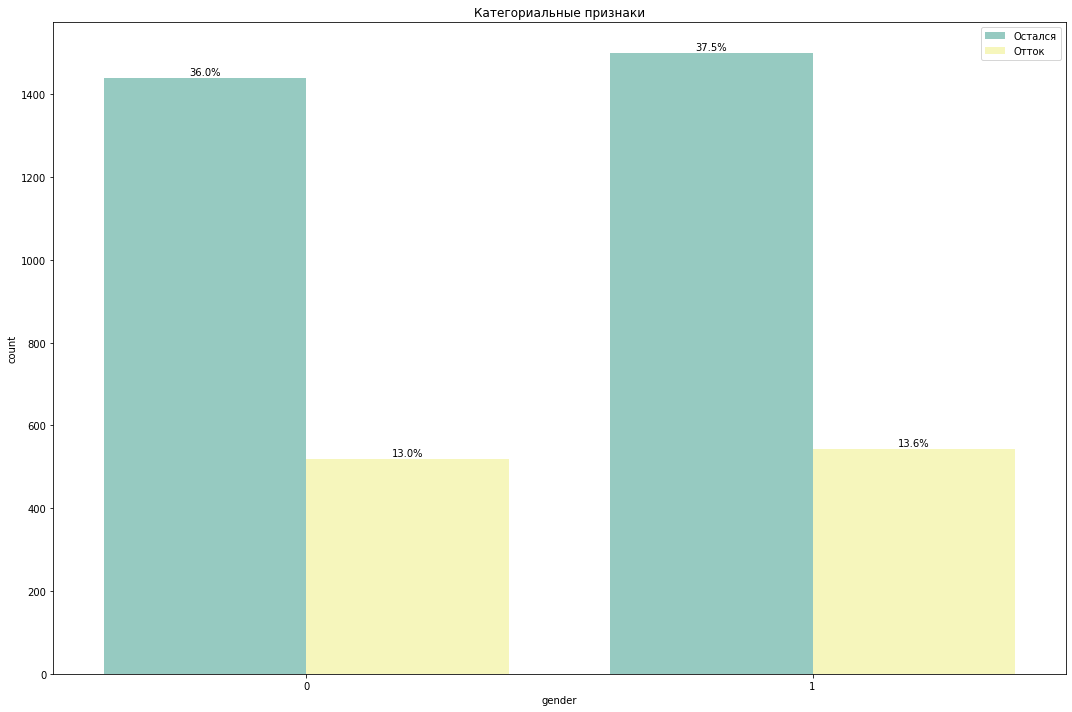

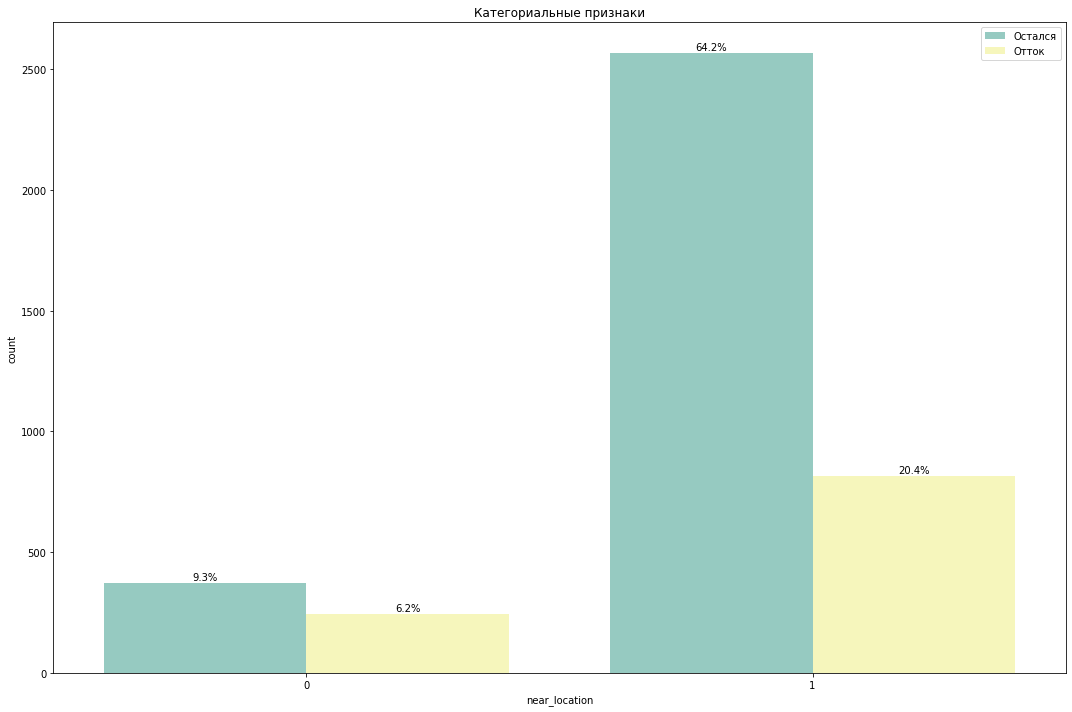

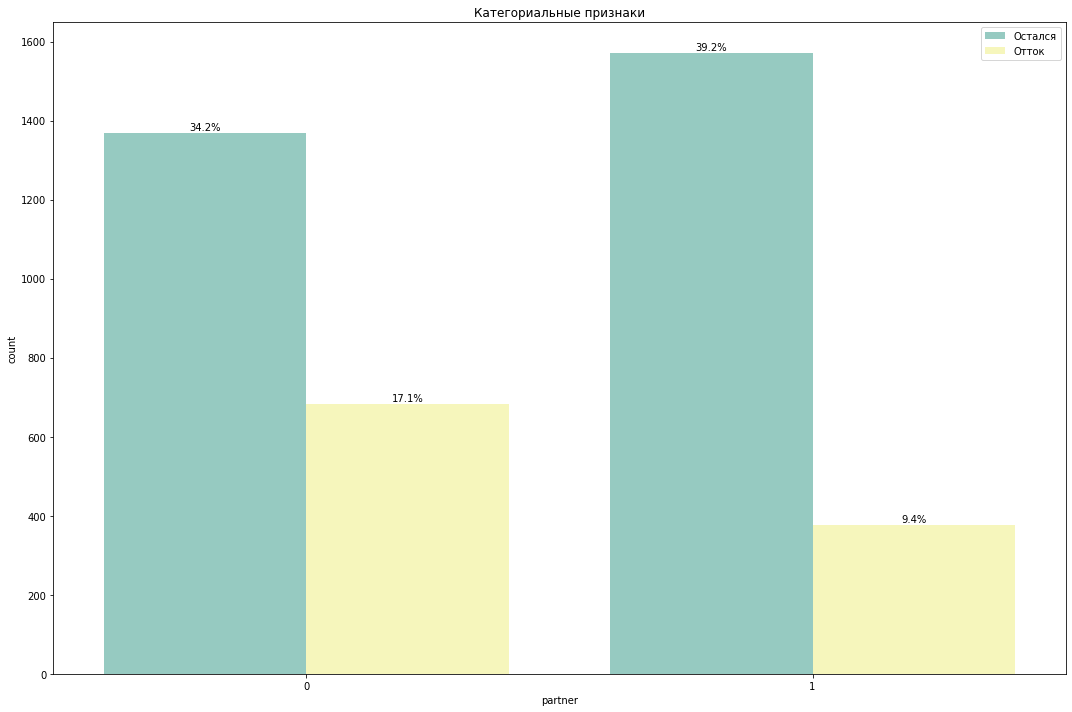

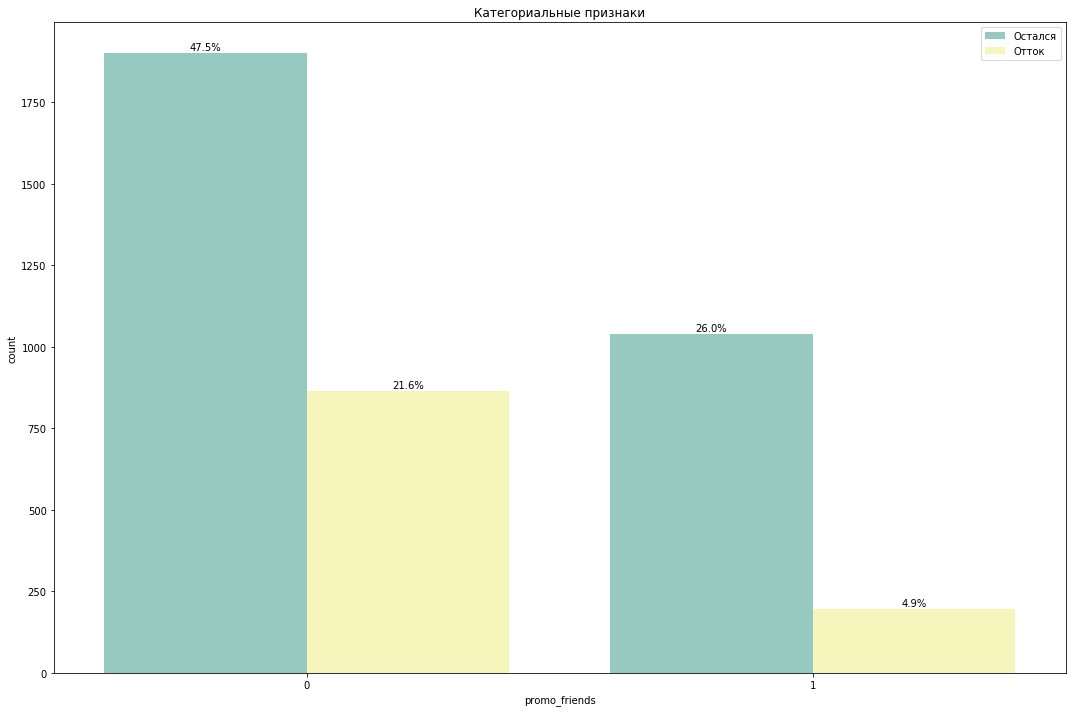

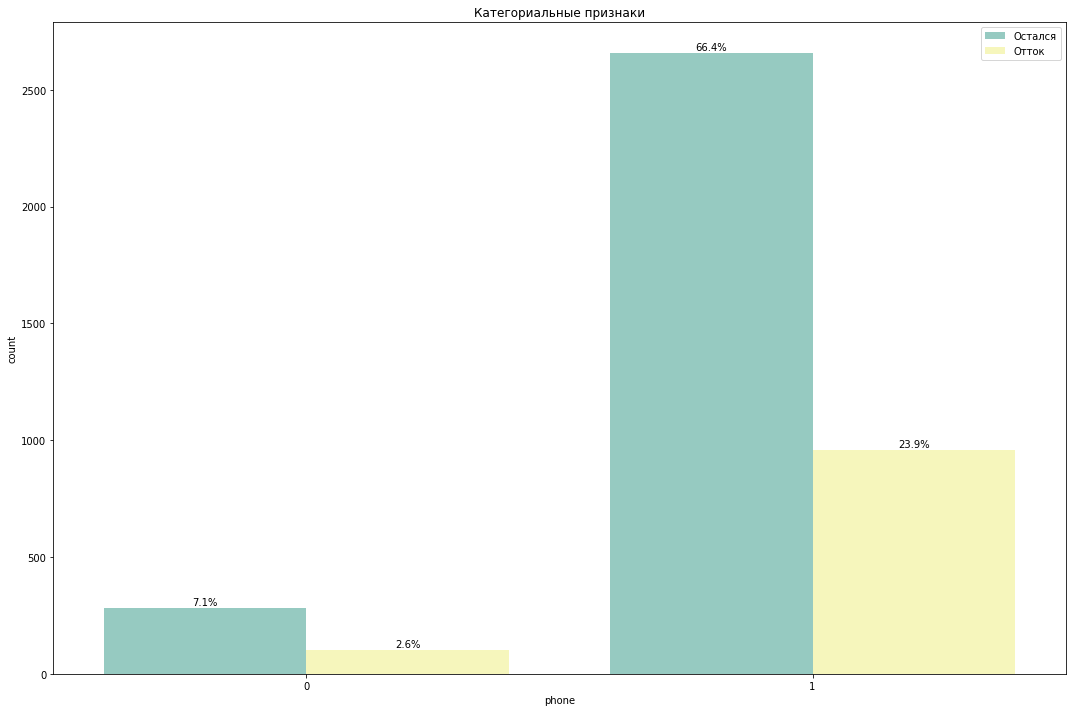

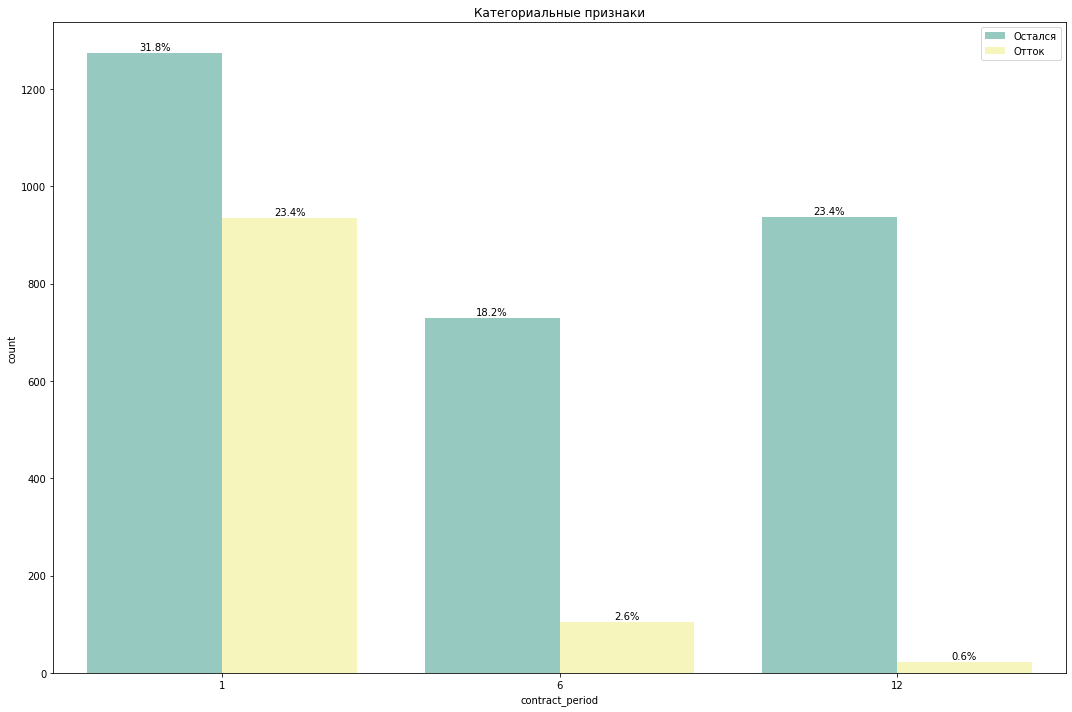

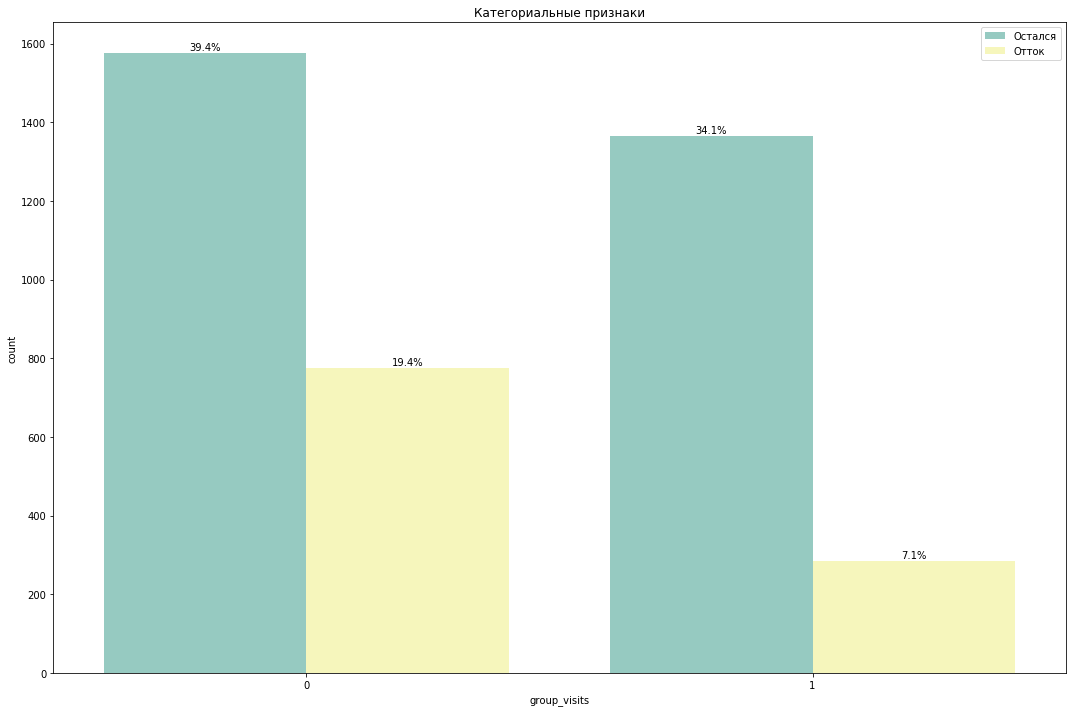

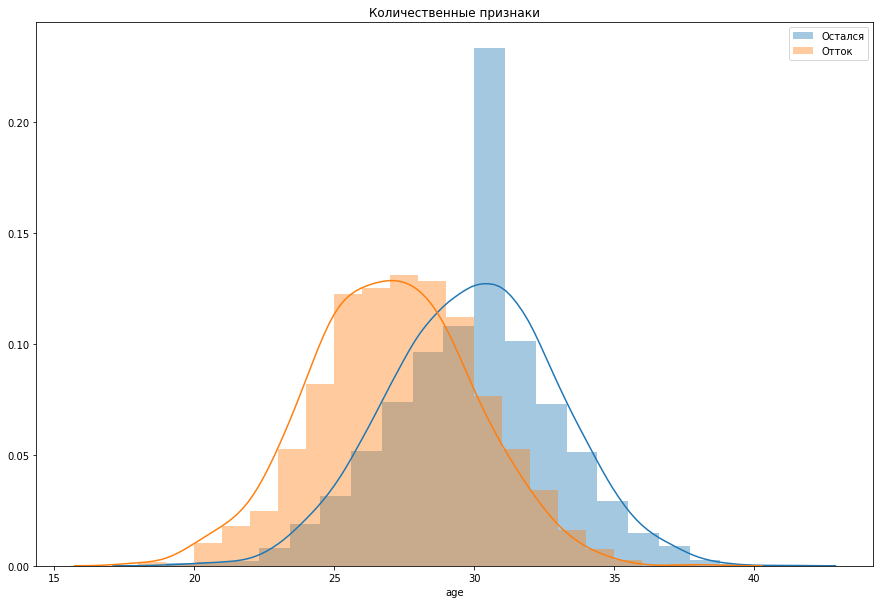

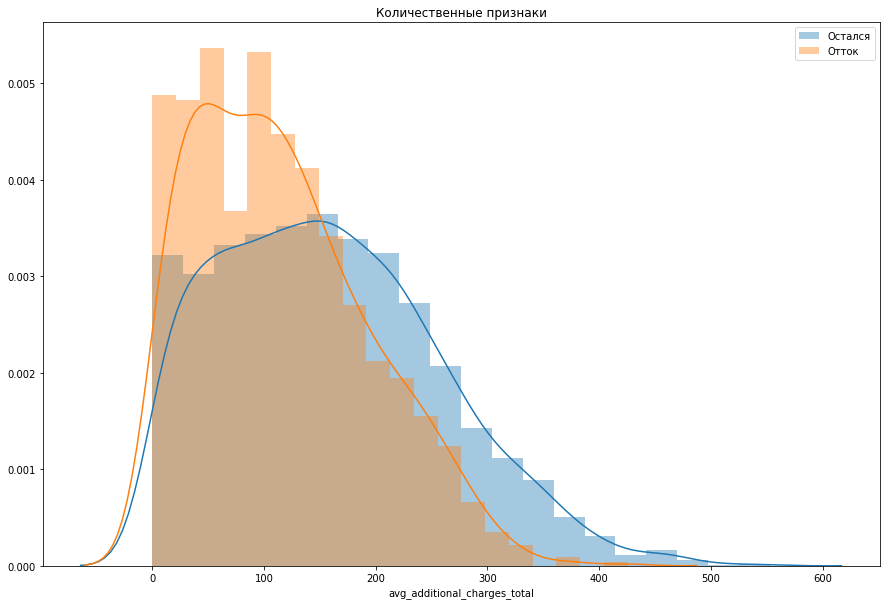

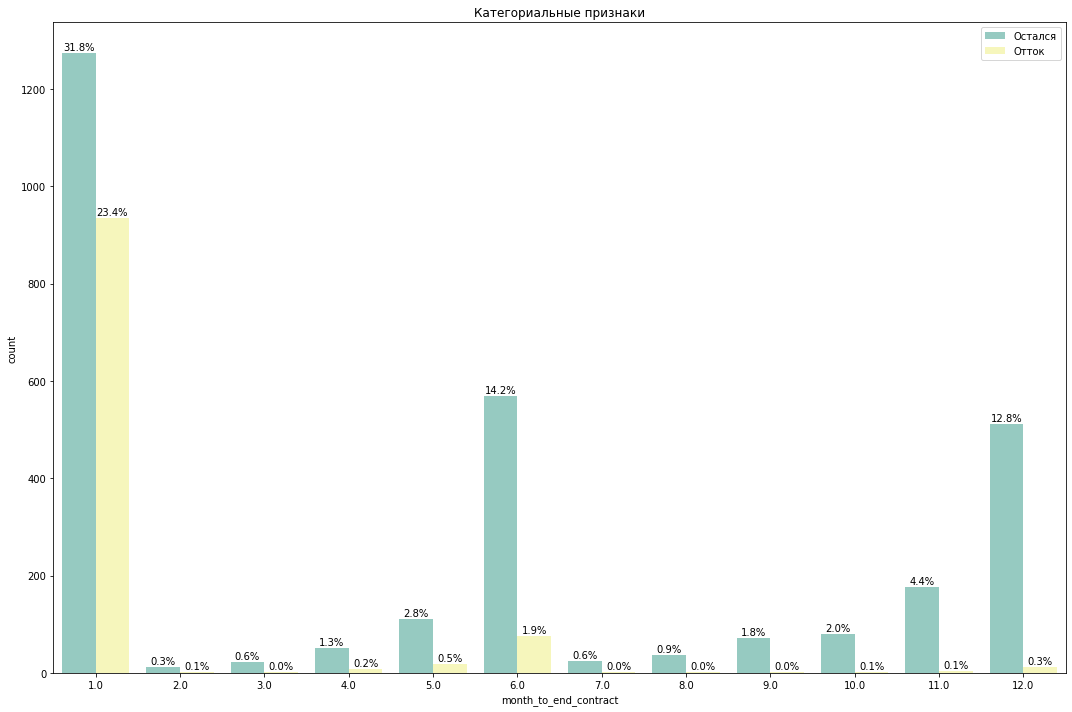

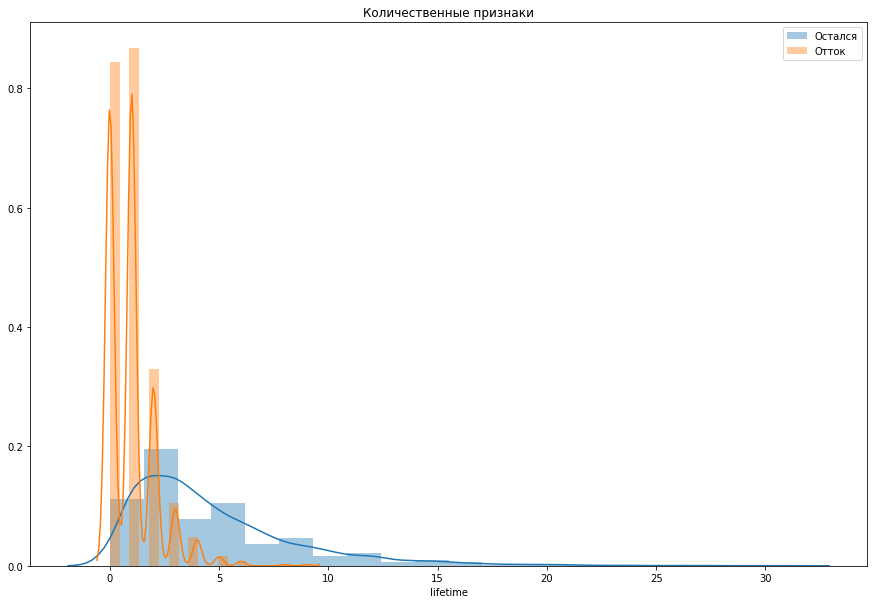

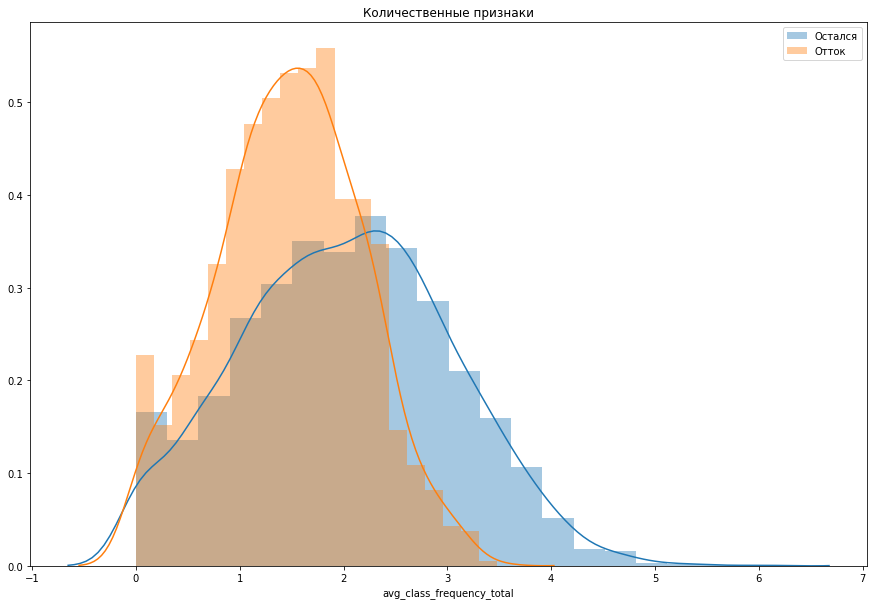

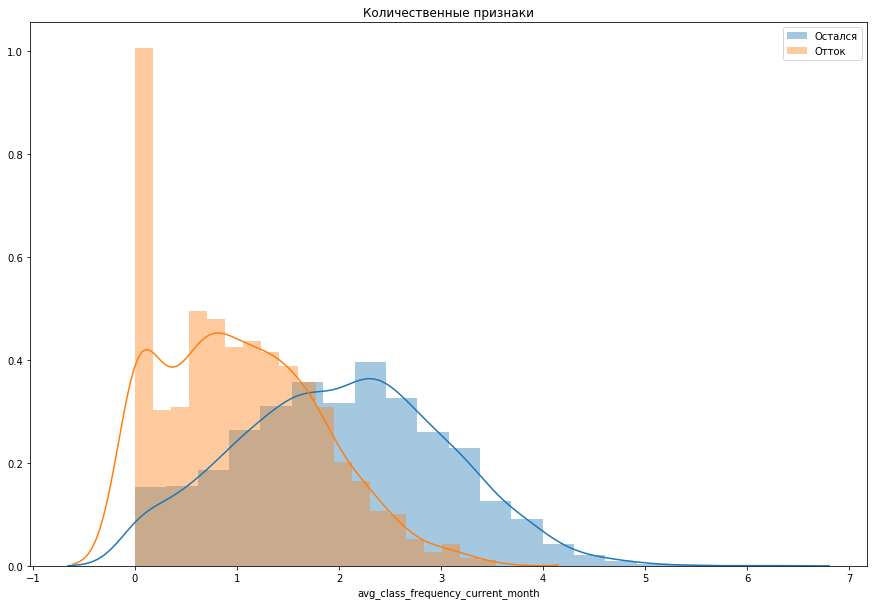

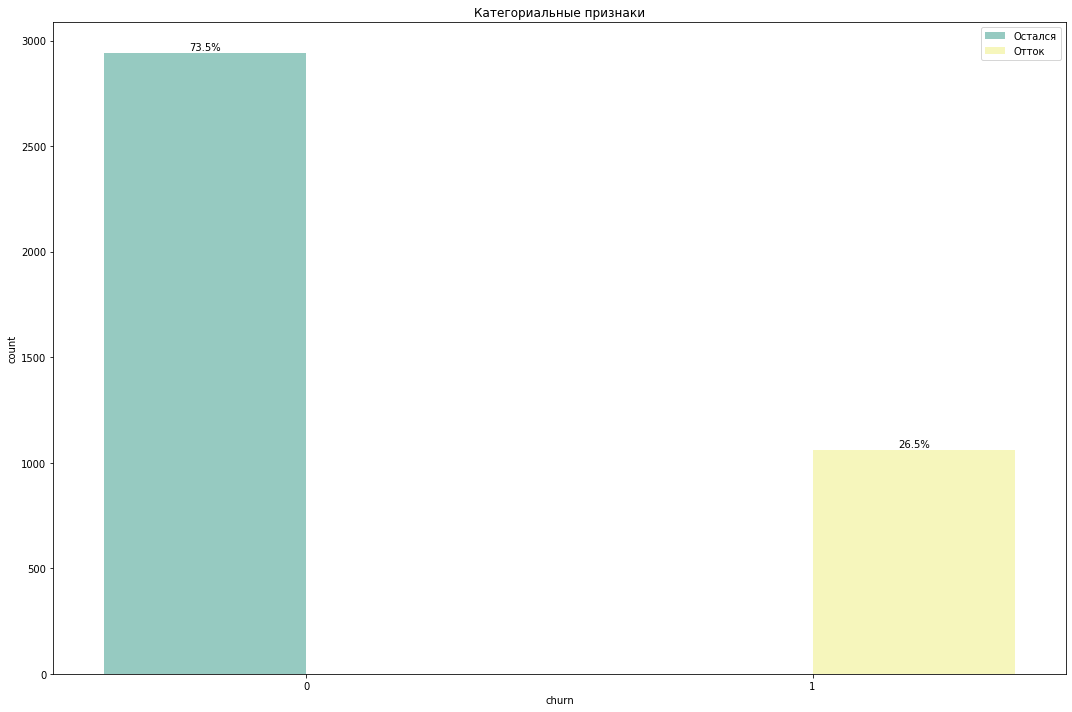

In [10]:
for feature in clients.columns:
    if feature not in categorical and feature not in ['contract_period', 'month_to_end_contract']:
        plt.figure(figsize = (15,10))
        plt.title('Количественные признаки')
        sns.distplot(clients[clients['churn'] == 0][feature], bins = 20, label = 'Остался')
        sns.distplot(clients[clients['churn'] == 1][feature], bins = 20, label = 'Отток')
        plt.legend()
        plt.show()                 
    else:
        plt.figure(figsize = (15,10))
        plt.title('Категориальные признаки')
        ax = sns.countplot(clients[feature], hue = clients['churn'], palette="Set3")
        total = len(clients)
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%\n'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center')
        plt.tight_layout()
        plt.legend(labels = ['Остался','Отток'])
        plt.show()

Видим, что на графиках нет выбросов и они достаточно репрезентативны.
* Судя по графикам факт оттока не зависит от пола и наличия контактного телефона, при этом более 70 процентов клиентов в датафрейме не попали в отток. 
* Видно так же, что проживание или работа в районе фитнес-центра сильно снижает вероятность оттока. 
* Из графика признака "сотрудник компании-партнёра клуба" видно, что факт того, что если клиент является сотрудником компании, то это положительно влияет на отток, процент оставшихся увеличивается, а ушедших наоборот падает.
* Чем больше длительность абонемента, тем лучше выглядит соотношение отток/остался.
* Клиенты посещающие групповые занятия так же судя по всему с меньшей вероятностью попадут в отток.
* Высок так же отток у клиентов, до конца чьих абонементов остается 1 месяц.

По графикам всех количественных признаков можно увидеть различия в распределениях, что означает их разное влияние на отток.

<a id = 'Шаг_2_3' ></a>
#### Построим матрицу корреляций.

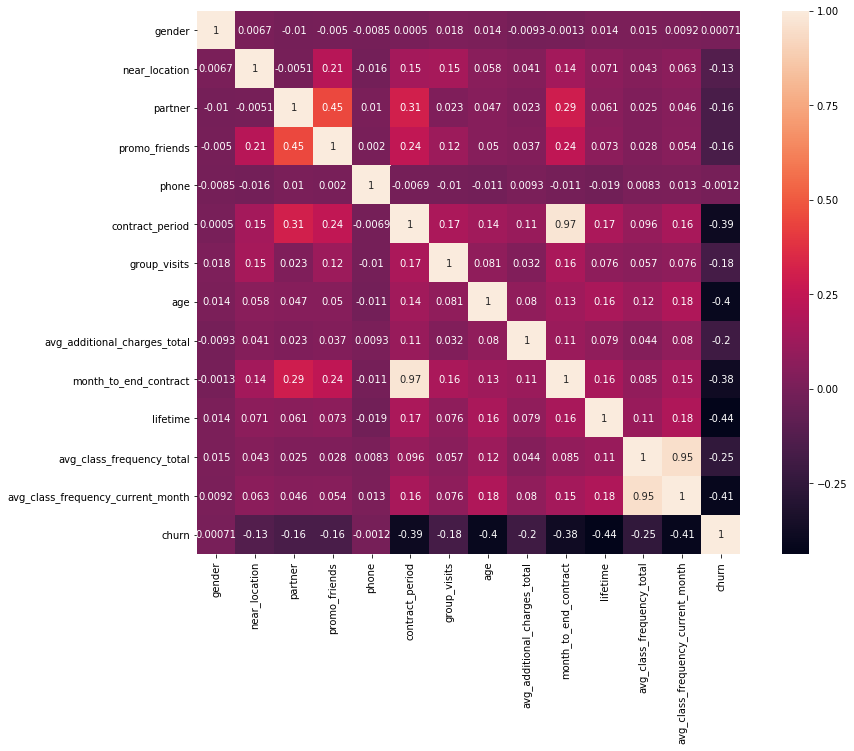

In [11]:
plt.figure(figsize = (15,10))
cm = clients.corr()  
sns.heatmap(cm, annot = True, square=True)
plt.show()

Из тепловой карты видно, что в датасете присутсвуют сильно коррелирующие признаки(срок до окончания текущего действующего абонемента (в месяцах) и длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год); А так же средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц), избавимся от них, чтобы избежать мультиколлинеарности на этапе обучения модели.

In [12]:
clients_new = clients.drop(['avg_class_frequency_total','month_to_end_contract'], axis = 1)
clients_new

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,8,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,2,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,3,1.596237,0


### Вывод
Импортированы необходимые библиотеки, данные загружены, пропуски и дубликаты отсутствуют. Визуальный анализ данных позволяет сделать первичные выводы о возможном отсутствии зависимости между полом, наличием контактного телефона и фактом оттока. Так же судя по графикам, в данных отсутсвуют выбросы. Распределение количественных признаков либо нормальное, либо тяготеет к нормальному. Учитывая все вышесказанное, можно приступить к обучению моделей.

<a id = 'Шаг_3' > </a>
## Шаг 3. Построение модели прогнозирования оттока

In [13]:
# разделяем данные на признаки (матрица X) и целевую переменную (y)
X = clients_new.drop('churn', axis = 1)
y = clients_new['churn']

<a id = 'Шаг_3_1' > </a>
#### Разделим данные на обучающую и валидационную выборки.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

Из-за сильной разницы в стандартных отклонениях, необходимо стандартизировать данные перед тем, как обучать модель.

In [15]:
scaler = StandardScaler() 
scaler.fit(X) 
X_train_sc = scaler.fit_transform(X_train) 
X_test_st = scaler.transform(X_test)

In [16]:
#Зададим модели
models = [LogisticRegression(random_state = 0), RandomForestClassifier(random_state = 0)]

<a id = 'Шаг_3_2' > </a>
#### Получим метрики для двух алгоритмов

In [17]:
for m in models:
    m.fit(X_train_sc, y_train)
    y_pred = m.predict(X_test_st)
    print('Model: ', type(m).__name__)
    print('Accuracy: {:.2f} precision: {:.2f} recall: {:.2f} '.format(accuracy_score(y_test, y_pred), 
                                                                precision_score(y_test, y_pred),
                                                                recall_score(y_test, y_pred))
                                                                    )
    print()

Model:  LogisticRegression
Accuracy: 0.92 precision: 0.85 recall: 0.84 

Model:  RandomForestClassifier
Accuracy: 0.89 precision: 0.84 recall: 0.73 



### Вывод
Логистическая регрессия показывает немного лучшую долю правильных ответов, а так же полноту и точность выше, чем у случайного леса. В данном случае скорее всего лучшей на основании метрик стоит признать логистическую регрессию.
Судя по всему алгоритм логистической регрессии лучше отличает классы друг от друга и обнаружение нужного класса происходит с большей точностью. 

<a id = 'Шаг_4' > </a>
## Шаг 4. Проведем кластеризацию клиентов.

Стандартизируем данные

In [18]:
x_sc = scaler.fit_transform(clients_new.drop(columns = ['churn']))

In [19]:
print(x_sc[:10]) 

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121 -0.19332863 -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  0.87368001  0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.46008079 -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237 -0.46008079  1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.19332863 -0.61454183]
 [ 0.97970588  0.42788074 -0.973842   -0.66793083  0.32681319 -0.8092194
   1.19403206  1.478149    3.15330097 -0.19332863  0.82634551]
 [ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206  0.86426788 -0.54676556 -0.46008079 -0.46525669]
 [-1.0207145   0.42788074 -0.973842   -0.667

<a id = 'Шаг_4_1' > </a>
#### Построим матрицу расстояний и дендрограмму.

In [20]:
linked = linkage(x_sc, method = 'ward') 
print(linked)

[[5.47000000e+02 3.88400000e+03 1.11541554e-02 2.00000000e+00]
 [1.46000000e+03 1.53800000e+03 2.48829986e-02 2.00000000e+00]
 [2.36600000e+03 3.42500000e+03 2.93974563e-02 2.00000000e+00]
 ...
 [7.98400000e+03 7.99500000e+03 8.46938585e+01 2.64900000e+03]
 [7.98500000e+03 7.99600000e+03 8.95369955e+01 3.03500000e+03]
 [7.99200000e+03 7.99700000e+03 9.06663627e+01 4.00000000e+03]]


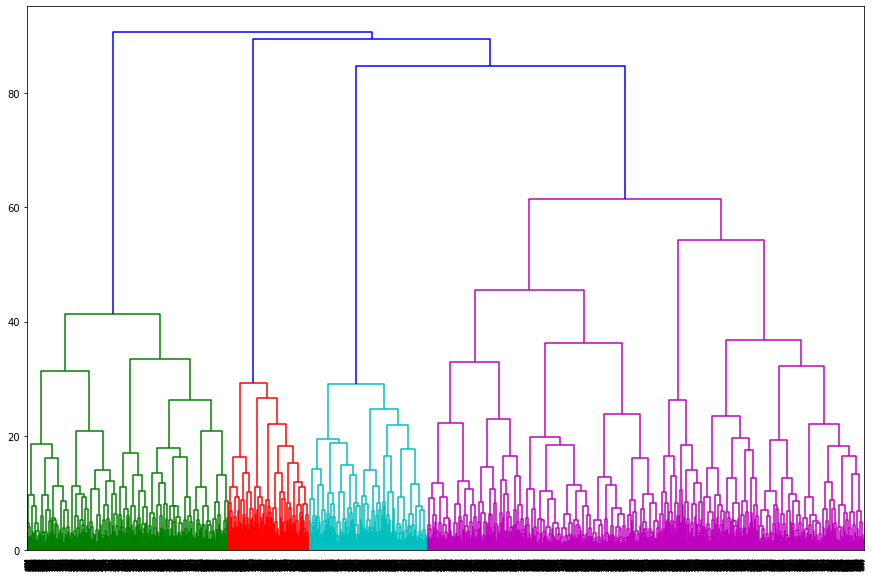

In [21]:
# Дендрограмма
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Судя по полученному графику дендрограммы можно выделить 5 классов, однако функция dendrogram выделяет 4.

<a id = 'Шаг_4_2' ></a>
#### Обучим модель кластеризации

In [22]:
km = KMeans(n_clusters = 5, random_state = 5) 
labels = km.fit_predict(x_sc)

In [23]:
# Сохраняем метки кластеров в датасет
clients_new['cluster_km'] = labels

Посмотрим на средние значения признаков для кластеров.

In [24]:
clients_new.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,
0,0.499109,0.000000,0.490196,0.078431,1.0,3.042781,0.237077,28.711230,136.792957,3.024955,1.603110,0.401070
1,0.484515,1.000000,0.275724,0.118881,1.0,2.045954,0.257742,27.309690,117.430958,1.735265,1.095875,0.616384
2,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839
3,0.493333,0.996444,0.959111,0.789333,1.0,8.208000,0.519111,29.732444,156.540659,4.331556,1.967691,0.075556
4,0.559871,0.998921,0.145631,0.070119,1.0,4.198490,0.549083,30.782093,174.447761,5.470334,2.365467,0.033441


Судя по полученной таблице, можно сказать, например, что пол не влияет на распределение по кластерам. Судя по всему основной вклад вносят такие признаки как: partner, contract_period, age, avg_additional_charges_total, lifetime.

Построим распределения признаков для кластеров.

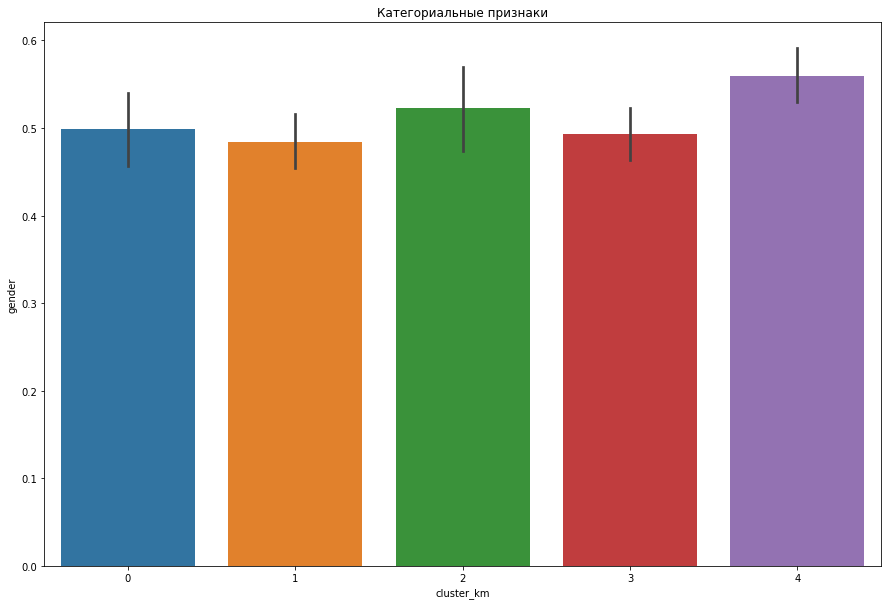

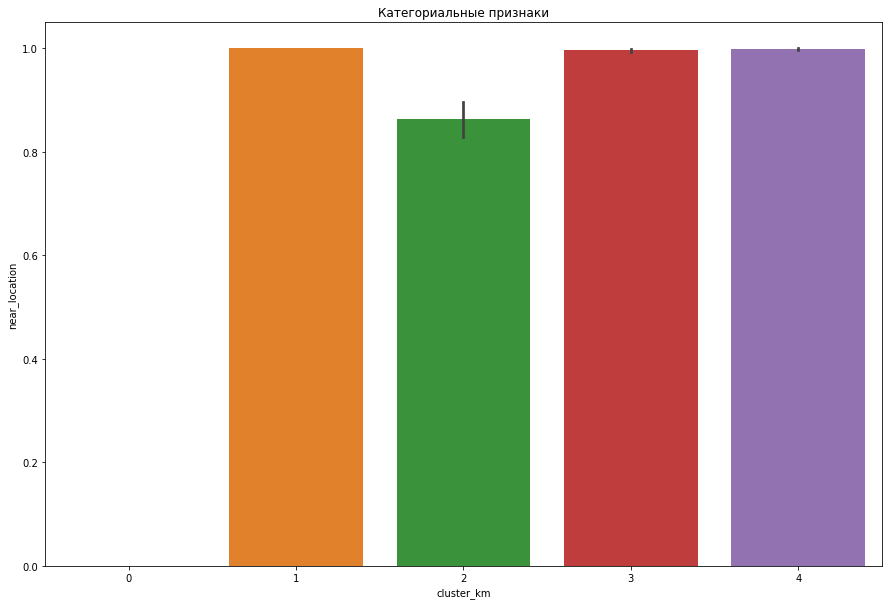

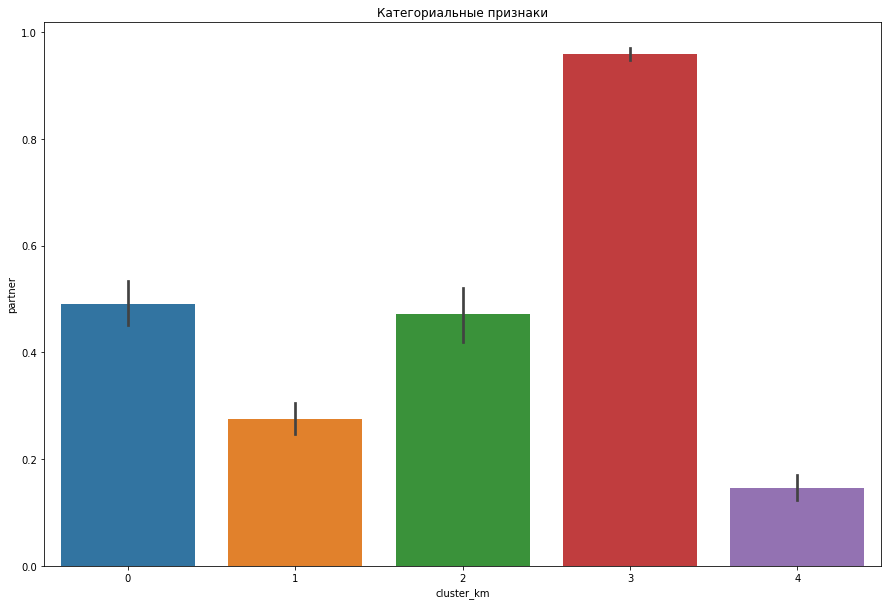

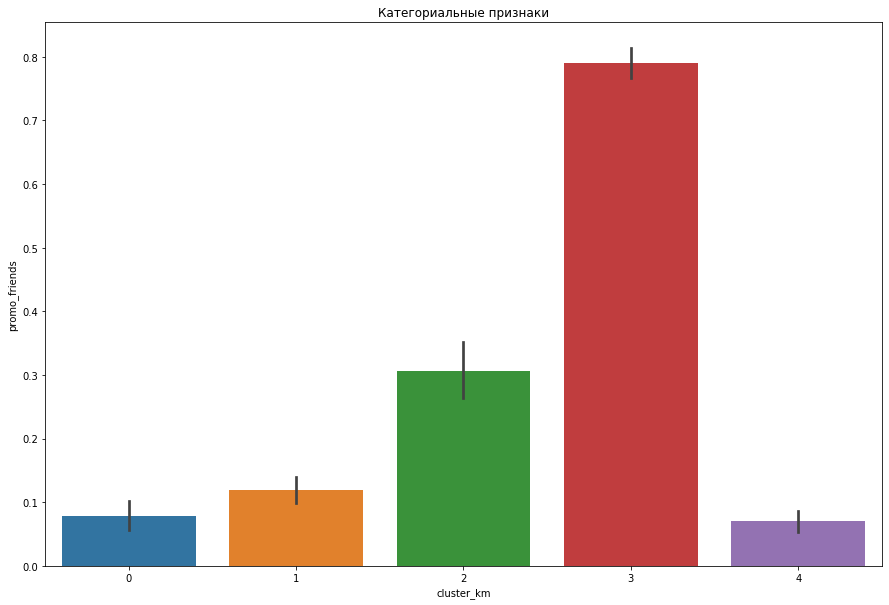

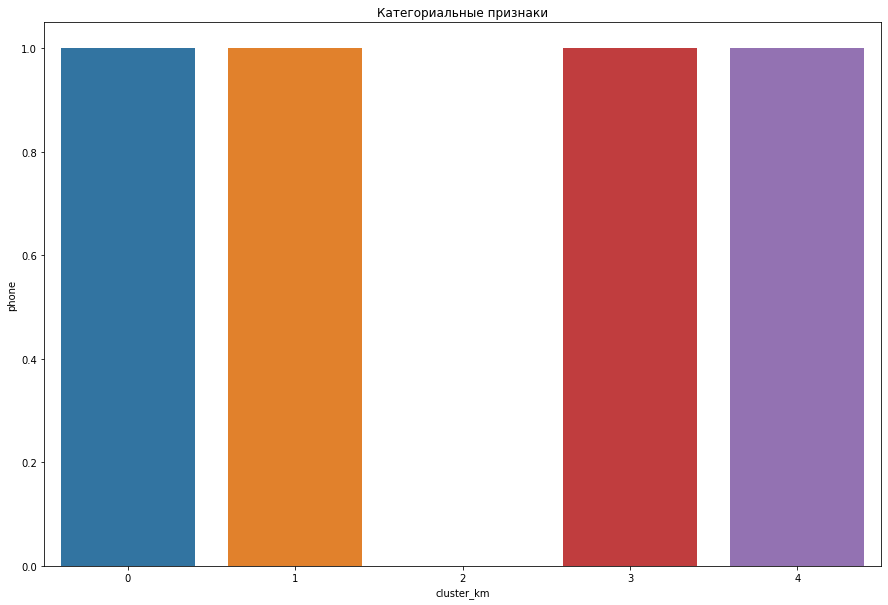

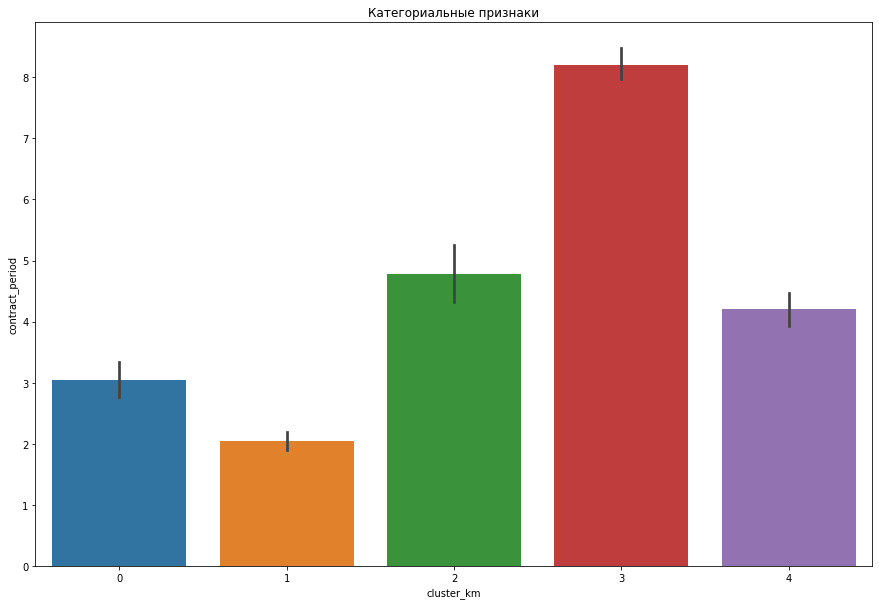

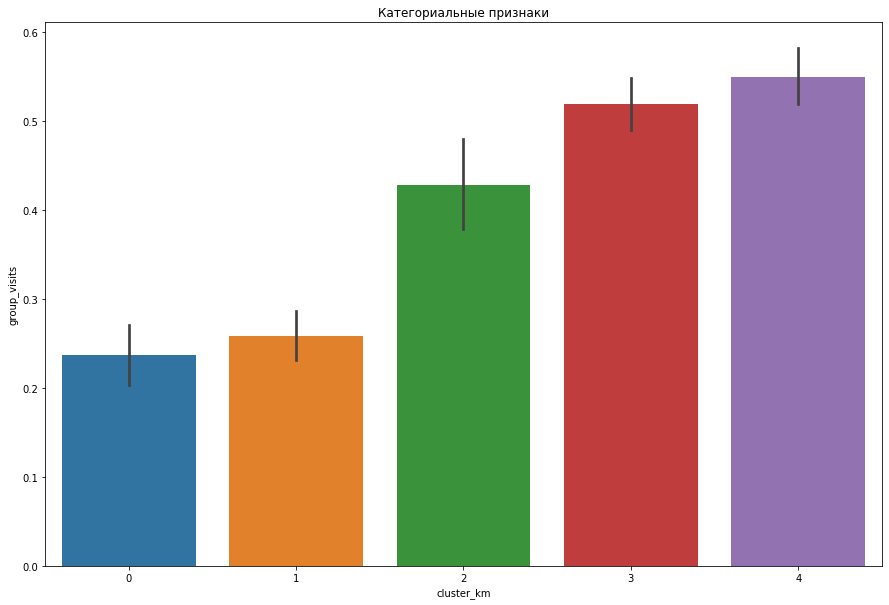

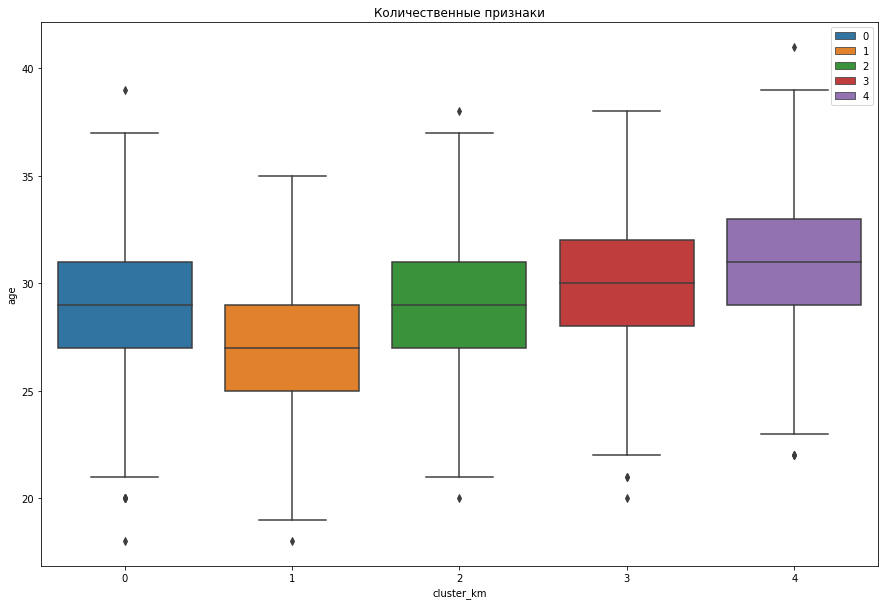

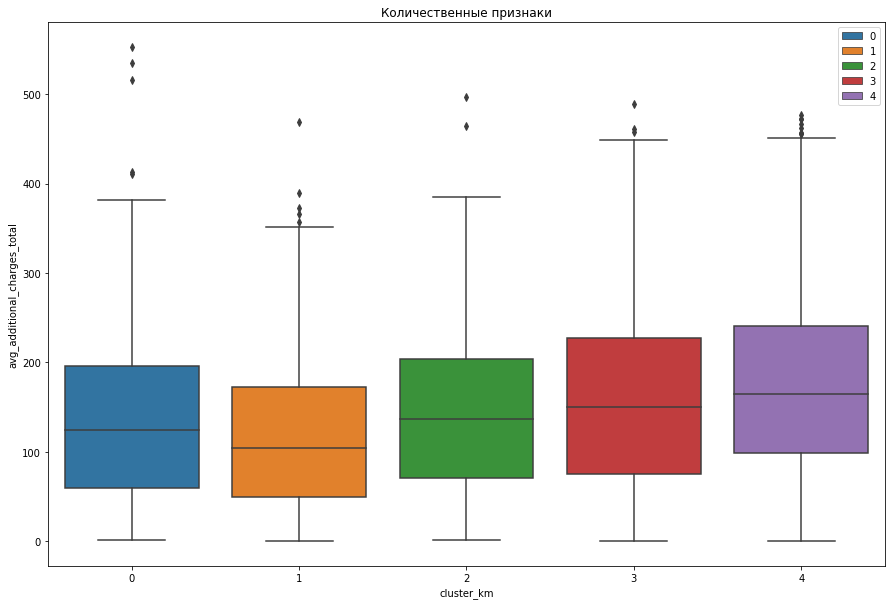

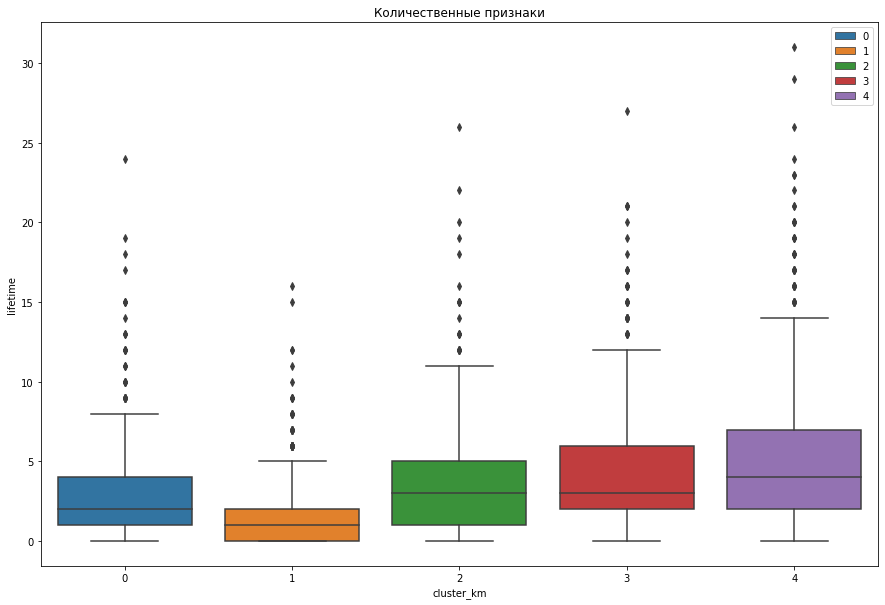

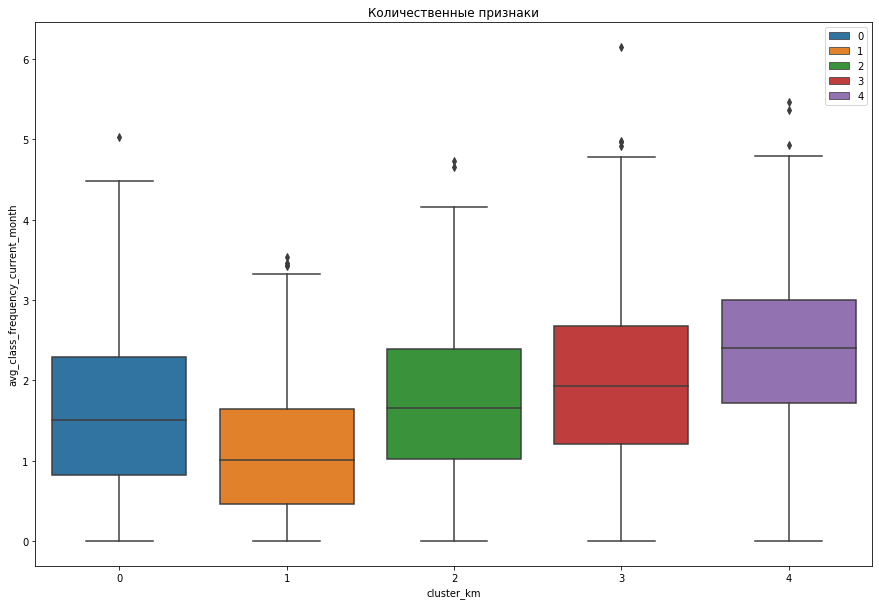

In [25]:
for feature in clients_new.drop(['cluster_km', 'churn'], axis = 1).columns:
    if feature not in categorical and feature not in ['contract_period', 'month_to_end_contract']:
        plt.figure(figsize = (15,10))
        plt.title('Количественные признаки')
        sns.boxplot(data = clients_new, x = 'cluster_km', y = feature, hue = 'cluster_km', dodge=False)
        plt.legend()
        plt.show()                 
    else:
        plt.figure(figsize = (15,10))
        plt.title('Категориальные признаки')
        ax = sns.barplot(data = clients_new, x = 'cluster_km', y = feature)
        plt.show()

Из графиков видно, что действительно параметр partner в различных кластерах имеет различный процент положительных значений, что означает влияние на формирование кластеров. Так же contract_period, распределение по кластерам признака age так же достаточно различаются. График avg_additional_charges_total показывает, что по кластерам признаки достаточно различаются. Аналогичную картину наблюдаем с признаком avg_class_frequency_current_month. По графику lifetime так же видим отличие по кластерам, что подтверждает ранее высказанное.

<a id = 'Шаг_4_3' > </a>
#### Считаем долю оттока

In [26]:
clients_new.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,
0,0.499109,0.000000,0.490196,0.078431,1.0,3.042781,0.237077,28.711230,136.792957,3.024955,1.603110,0.401070
1,0.484515,1.000000,0.275724,0.118881,1.0,2.045954,0.257742,27.309690,117.430958,1.735265,1.095875,0.616384
2,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839
3,0.493333,0.996444,0.959111,0.789333,1.0,8.208000,0.519111,29.732444,156.540659,4.331556,1.967691,0.075556
4,0.559871,0.998921,0.145631,0.070119,1.0,4.198490,0.549083,30.782093,174.447761,5.470334,2.365467,0.033441


Видим, что почти все кластеры отличаются по средней доле оттока. Почти все признаки наиболее устойчивых к оттоку кластеров являются наибольшими в среднем.
Охарактеризуем группы, наиболее и наименее подверженные оттоку. Судя по полученным результатам; 
* Клиенты, которые с наименьшей вероятностью перестанут ходить в фитнес клуб живут поблизости, в большинстве своем не сотрудники компании-партнера, часто посещают групповые занятия, в среднем старше 30 лет, их Lifetime в среднем больше 5 месяцев, а так же они больше всего тратят на дополнительные услуги центра(174.448) и посещают зал чаще двух раз в неделю.
* Напротив группа наиболее подверженных оттоку клиентов самая молодая (около 27 лет), редко посещают групповые занятия, тратит на доп услуги меньше всех(117.43), их lifetime менее 2, а частота посещений в неделю равна примерно единице.

<a id = 'Шаг_5'> </a>
## Шаг 5. Сформулируем выводы и рекомендации по работе с клиентами.

##### В результате проведения анализа можно сделать несколько основных выводов:
* Для прогнозирования оттока клиентов следует воспользоваться логистической регрессией, она дает наиболее точные и полные результаты.
* Были выделены наиболее яркие группы, сильно подверженные оттоку и наоборот. Оказалось, что скорее всего наиболее сильно на отток влияют такие параметры, как  частота посещений, посещение групповых занятий, время с момента первого обращения в центр.
Исходя из вышесказанного, основные финансы и усилия маркетингового отдела необходимо направить на увеличение этих признаков в целевой группе до 30 лет.

##### Возможные рекомендации по уменьшению оттока и взаимодействию с клиентами:
* Введение бонусов на основе количества посещений, которые можно тратить на дополнительные услуги фитнес-центра , чтобы мотивировать клиентов приходить чаще и тратить деньги на доп.услуги, таким образом улучшая оба параметра.
* Обозначить и ввести для клиентов подарки, которые будут выдываться по достижению определенного периода посещения, например, 6 месяцев(например, пакет тренировок).
* Так же можно добавить разнообразия групповым занятиям, добавив современные популярные виды тренировок помимо стандартных (единоборства, йога, пилатес, танцы и т.д.)
* Чтобы сохранить лояльность группы, меньше всего подверженной оттоку, можно предлагать персонализированные специальные предложения.